In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import multiprocessing   as mp

import gym
import Portfolio_Gym
import DQN_II

In [2]:
# This notebook facilitates the application of the DQN agent to the 
# historical environment.

In [7]:
def Run(A):
    np.random.seed(A)
    Network_Hypers = {"Learning Rate" : 0.075,
                      "Epoch"         : 5,
                      "Network Size"  : [32, 16],
                      "Activation"    : "Sigmoid",
                      "Alpha"         : 0.015, 
                      "Batch_Size"    : 256}

    Env = gym.make('Historical_Monthly-v1')
    Env.Set_Params(Risk_Aversion = 1,  Episode_Length = 12,  Max_Leverage  = 5,
                   Min_Leverage = -5,  Validation_Frac = 0.3, Intermediate_Reward = True)

    myDQN = DQN_II.DQN(Env, 11, Network_Hypers, Batch_Size = 2048, Retrain_Frequency = 256, 
                       Gamma = 0.9992, Epsilon_Range = [1, 0.1], Epsilon_Anneal = 0.9)


    print("The number of obs in Training set: " + str(int(Env.Data.shape[0] * 0.7)))
    Training = myDQN.Train(10000, ['Greedy_Merton'])
    Validating = Env.Validate(100, myDQN)

    f, ax = plt.subplots(1,2, figsize = (20,10))
    ax[1].scatter(np.arange(len(Validating[0])), Validating[0], label = 'DQN', color = 'lightskyblue')
    ax[1].scatter(np.arange(len(Validating[1])), Validating[1], label = 'RFree', color = 'mediumvioletred')
    ax[1].scatter(np.arange(len(Validating[2])), Validating[2], label = 'Merton', color = 'darkblue')
    
    ax[1].set_title(str(A))
    ax[1].set_ylabel("Utility")
    ax[1].set_xlabel("Validation Ep.")
    ax[1].legend()
    
#     ax[0].plot(Training['Ave_Perf'])
    Training['Greedy_Merton'] = np.array(Training['Greedy_Merton'])
    ax[0].scatter(np.arange(Training['Greedy_Merton'].shape[0]), Training['Greedy_Merton'][:,0], label = 'DQN', color = 'lightskyblue')
    ax[0].scatter(np.arange(Training['Greedy_Merton'].shape[0]), Training['Greedy_Merton'][:,1], label = 'Merton', color = 'mediumvioletred')
    ax[0].legend()
    plt.show()

    print("")
    print(str(A) + "      DQN Mean: " +  str(round(np.mean(Validating[0]), 4)) + ", Std: " + str(round(np.std(Validating[0]), 4))) 
    print(str(A) + "Risk Free Mean: " +  str(round(np.mean(Validating[1]), 4)) + ", Std: " + str(round(np.std(Validating[1]), 4)))
    print(str(A) + "   Merton Mean: " +  str(round(np.mean(Validating[2]), 4)) + ", Std: " + str(round(np.std(Validating[2]), 4)))
    print("")



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


The number of obs in Training set: 772
The number of obs in Training set: 772


  0%|          | 0/10000 [00:00<?, ?it/s]

The number of obs in Training set: 772


100%|██████████| 10000/10000 [10:12<00:00,  9.51it/s]


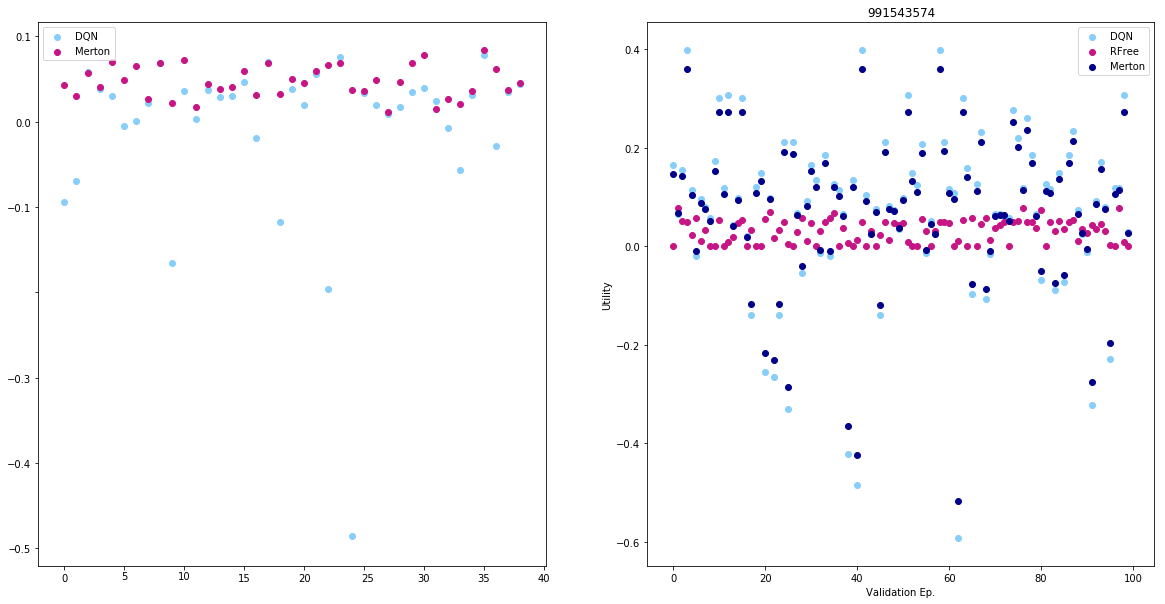


991543574      DQN Mean: 0.073, Std: 0.1736
991543574Risk Free Mean: 0.0311, Std: 0.0233
991543574   Merton Mean: 0.0692, Std: 0.1528



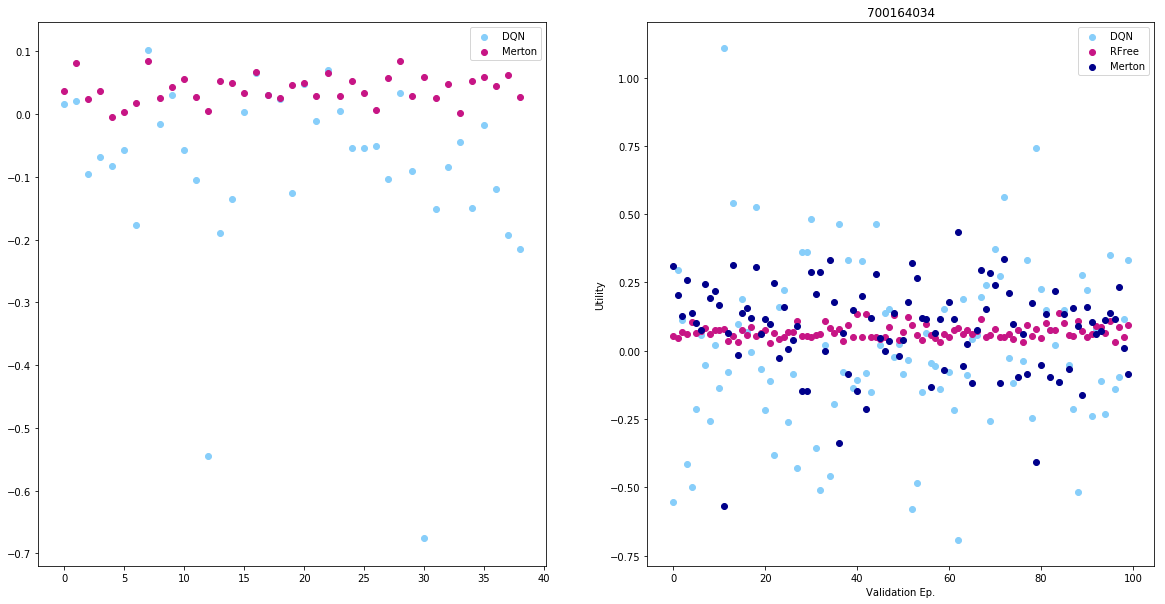


700164034      DQN Mean: 0.0093, Std: 0.2977
700164034Risk Free Mean: 0.0695, Std: 0.0246
700164034   Merton Mean: 0.0857, Std: 0.1633



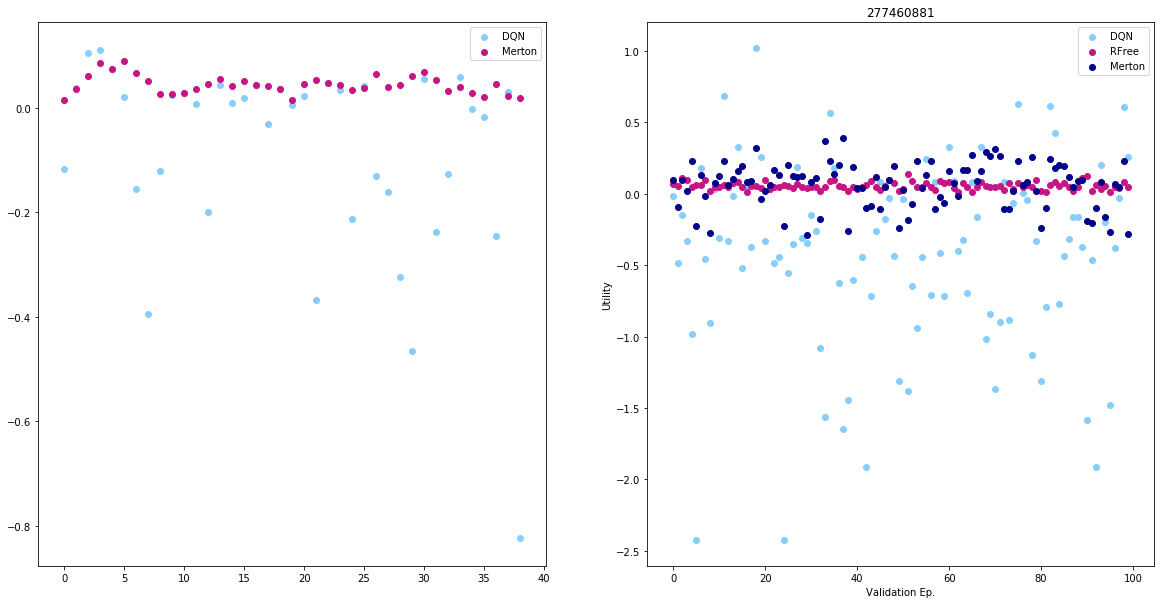


277460881      DQN Mean: -0.414, Std: 0.6517
277460881Risk Free Mean: 0.0559, Std: 0.0257
277460881   Merton Mean: 0.0601, Std: 0.1602

CPU times: user 5.96 s, sys: 3.32 s, total: 9.28 s
Wall time: 10min 16s


In [8]:
%%time

with mp.Pool(mp.cpu_count()) as pool:
    _ = pool.map(Run, np.random.randint(0, int(1e9), 3))
